In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# RBM model definition
class RBM(nn.Module):
    def __init__(self, n_visible=784, n_hidden=500):
        super(RBM, self).__init__()
        self.W = nn.Parameter(torch.randn(n_hidden, n_visible) * 0.1)
        self.h = nn.Parameter(torch.zeros(n_hidden))
        self.v = nn.Parameter(torch.zeros(n_visible))
    
    def v_to_h(self, v):
        h_probs = torch.sigmoid((v @ self.W.T) + self.h)
        h_value = torch.bernoulli(h_probs)
        return h_value, h_probs

    def h_to_v(self, h):
        v_probs = torch.sigmoid((h @ self.W) + self.v)
        v_value = torch.bernoulli(v_probs)
        return v_value, v_probs

    def forward(self, v):
        h_value, h_probs = self.v_to_h(v)
        v_value, v_probs = self.h_to_v(h_value)
        return v_value

    def contrastive_divergence(self, v, lr=0.01):
        h_value, h_probs = self.v_to_h(v)
        v_value, v_probs = self.h_to_v(h_value)
        h_value2, h_probs2 = self.v_to_h(v_probs)

        # Update parameters
        self.W.data += lr * ((h_probs.T @ v) - (h_probs2.T @ v_probs)) / v.size(0)
        self.v.data += lr * (v - v_probs).mean(0)
        self.h.data += lr * (h_probs - h_probs2).mean(0)

# Load MNIST
transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: x.view(-1))])
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)

# Initialize model
rbm = RBM(n_visible=784, n_hidden=256)

# Training
epochs = 5
for epoch in range(epochs):
    epoch_loss = 0
    for batch, _ in train_loader:
        batch = batch.bernoulli()  # Binarize input
        rbm.contrastive_divergence(batch)
        loss = torch.mean((batch - rbm(batch)) ** 2)
        epoch_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {epoch_loss / len(train_loader):.4f}")




Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9912422/9912422 [00:11<00:00, 865829.20it/s] 


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28881/28881 [00:00<00:00, 50968.06it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1648877/1648877 [00:01<00:00, 908460.57it/s] 


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4542/4542 [00:00<00:00, 2272248.18it/s]


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

Epoch 1, Loss: 0.1270
Epoch 2, Loss: 0.0908
Epoch 3, Loss: 0.0811
Epoch 4, Loss: 0.0754
Epoch 5, Loss: 0.0716


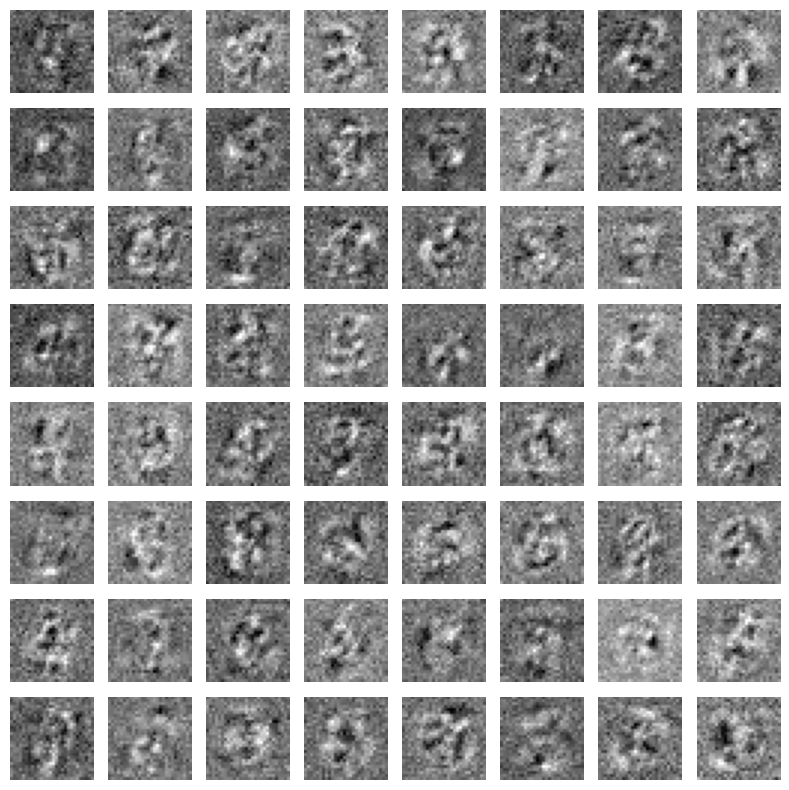

In [2]:
# Visualize weights
def visualize_weights(rbm, num=64):
    W = rbm.W.data.cpu()
    fig, axes = plt.subplots(int(num ** 0.5), int(num ** 0.5), figsize=(8, 8))
    for i, ax in enumerate(axes.flat):
        if i < num:
            ax.imshow(W[i].view(28, 28), cmap='gray')
            ax.axis('off')
    plt.tight_layout()
    plt.show()

visualize_weights(rbm)